to do:<br>
load and convert data into dataframe (done)<br>
heatmap to show related data (done)<br>
apply pcs to reduce features (done)<br>
split data into training and testing (done) <br>
use k-fold method (done) <br>
hyper-parameter tunning (done) <br>
evaluation matrix (done)<br>
graph(done) <br>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd #dataframe conversion, correlation matrix
from sklearn.datasets import load_breast_cancer# to access dataset
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler # to normalize
from sklearn.decomposition import PCA #dimentionality reduction
from sklearn.svm import SVC # model
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay #model evaluation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #heatmap

In [4]:
bc = load_breast_cancer()
#print(bc)
#convert into dataframe
x=pd.DataFrame(data=bc.data, columns=bc.feature_names)
y=pd.Series(data=bc.target)
x.head()
#print(bc)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


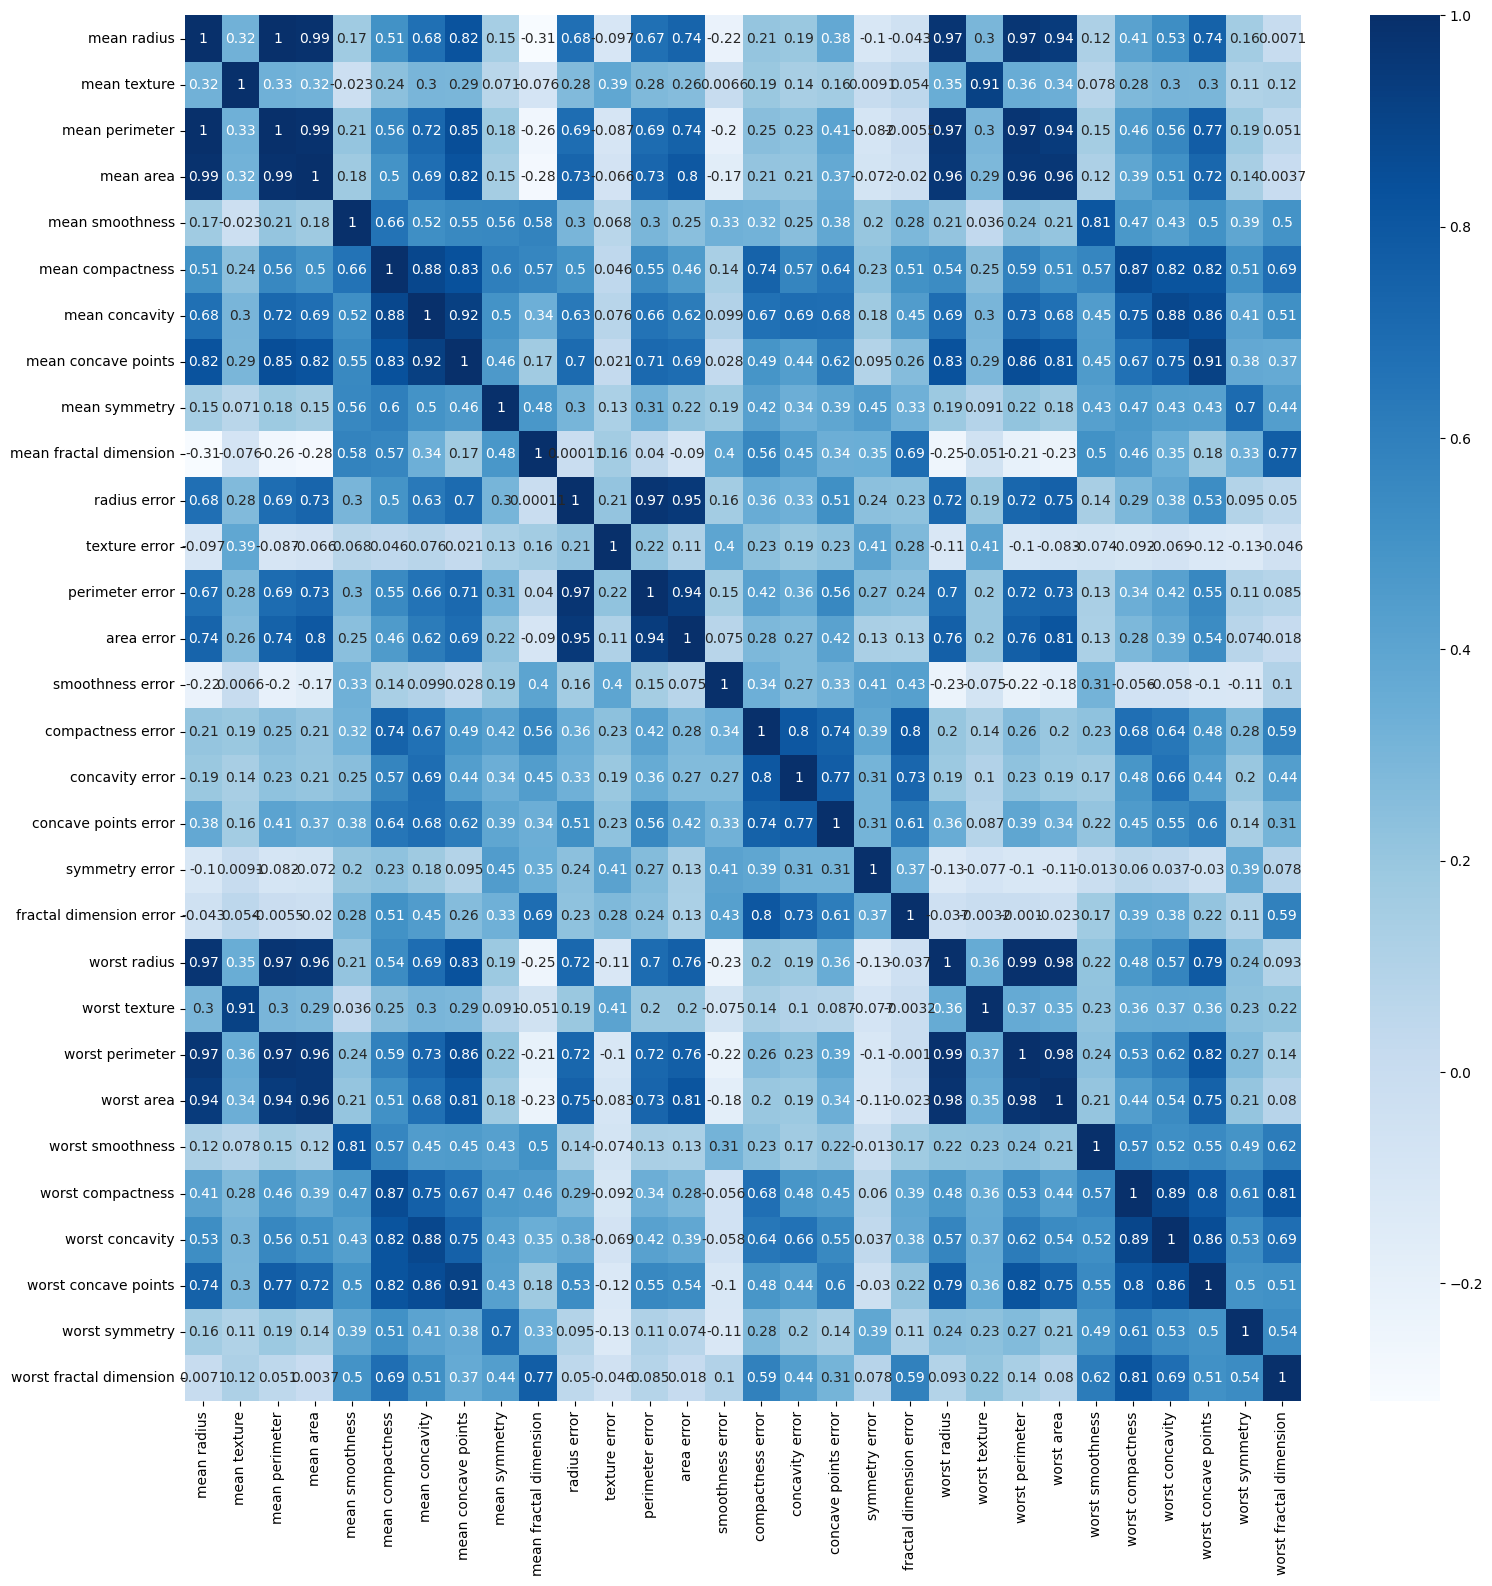

In [ ]:

#correlation matrix
correlation_matrix = x.corr()
#correlation_matrix
# Plot heatmap
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()
#dark: highly correlated

In [ ]:
#1 scale the data (to avoid unit)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
#fit() do computational need for scaling
#transform scaled the data base on that
#print(pd.DataFrame(X_scaled))

#drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)#column
#print(X_scaled)
#print(pd.DataFrame(X_scaled_drop).head()) #24 coloumns
#PCA on scaled data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled_drop)
#fit :calculate pc
#trsnsform : project reduced dimensional data
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",x.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 2)


In [ ]:
#splitting the data into training and testing part
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
#20% for testing
#random selection for spliting () //same shuffled data output
#print(x_test.head())

In [ ]:

# K-Fold Cross-Validation method for cross validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)#default>flase
#shuffle true;shuffle data before solitting

In [ ]:
#hyperparametr fof model

param_grid = {
    'C': [0.1, 1, 10],              # regularizarion
    'kernel': ['linear'],          # a Type of kernel ,
    #'gamma':[1, 0.1, 0.01]           # kernel coefficient(rbf)
}

In [ ]:
#hyperpatameter tunning using kf(cross validation) :to find best parameter
#svc:model
#cv:cross validation
gs=GridSearchCV(SVC(),param_grid,verbose=2,cv=kf)
#verbosity:detail of output
gs.fit(x_train,y_train)
#pd.DataFrame(gs.cv_results_)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']})

In [ ]:
# Best parameters and model
best_params = gs.best_params_
best_model = gs.best_estimator_

print("Best Hyperparameters:", best_params)
print(best_model)

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [ ]:
#evaluation of best model using cvs
cross_val_results = cross_val_score(best_model, x_pca, y,cv=kf)
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))

Cross-Validation Results: [0.95614035 0.95614035 0.95614035 0.95614035 0.95575221]
Mean Accuracy: 0.9560627231796305


<Figure size 800x600 with 0 Axes>

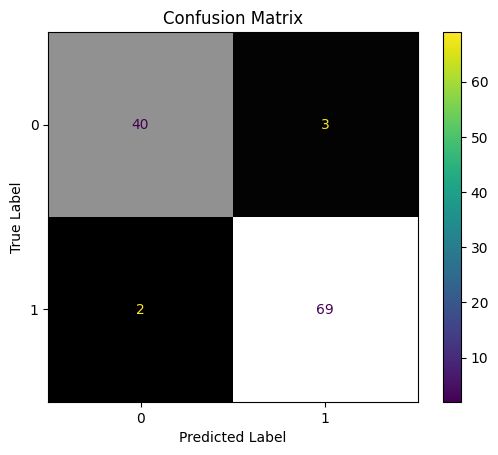

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
# Create the ConfusionMatrixDisplay object without 'cmap'
cm = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)#,values_format='d'
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#Access the underlying matplotlib Axes object and set the colormap
cm.ax_.imshow(cm.confusion_matrix, cmap='gray')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate on the test set
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#accuracy is printed seperately
#macroavg:avg of p,r,f1
#weight avg:avg with support (no of occurance)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
def plot_decision_boundary(model,x, y):
    """
    Plots the decision boundary of a model trained on 2D data after PCA transformation.
    Args:
        model: The trained classification model.
        X: The original feature data (before PCA).
        y: The target labels.
    """

    X_pca = x_pca

    # Create a meshgrid of points to plot the decision boundary
    x_min, x_max = X_pca.iloc[:, 0].min() - 1, X_pca.iloc[:, 0].max() + 1 # higher > compact points #way to lower> point may go outof grid
    y_min, y_max = X_pca.iloc[:, 1].min() - 1, X_pca.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

    # Predict class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #concatinate
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.couontrf(xx, yy, Z, alpha=0.4,cmap='gray' ) #hyperpalne
    # Scatter plot of actual data points
    #plt.grid(True)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k',cmap='gray' )#marker='grey'
    plt.title(f"Decision Boundary with Kernel: {best_params['kernel']}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

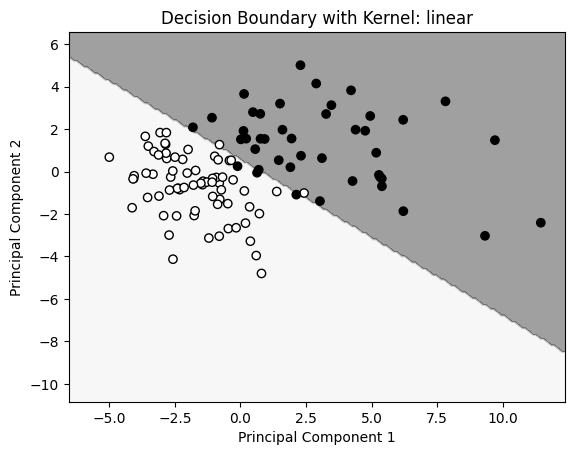

In [ ]:
plot_decision_boundary(best_model,x_test,y_test)